In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pad_dataset = pd.read_csv('datasets/PAD_20_Metadata.csv')

In [3]:
pad_dataset.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [4]:
pad_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

<Axes: title={'center': 'Disease Distribution'}, xlabel='diagnostic'>

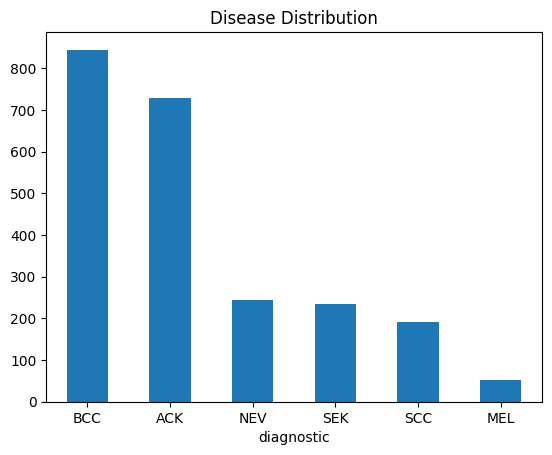

In [5]:
pad_dataset['diagnostic'].value_counts().plot.bar(rot=0, title="Disease Distribution")

In [6]:
pad_dataset['patient_id'].value_counts(ascending=False)[:20]

patient_id
PAT_645     10
PAT_388     10
PAT_330     10
PAT_53       7
PAT_270      7
PAT_115      7
PAT_1414     7
PAT_747      7
PAT_691      7
PAT_108      6
PAT_63       6
PAT_267      6
PAT_677      6
PAT_380      6
PAT_38       6
PAT_492      6
PAT_93       6
PAT_46       6
PAT_202      6
PAT_771      6
Name: count, dtype: int64

In [7]:
(pad_dataset['patient_id'].value_counts() > 1).sum()

544

In [8]:
len(pad_dataset['patient_id'].unique())

1373

In [9]:
for i in range(1, 11):
    count = (pad_dataset['patient_id'].value_counts() == i).sum()
    print(f'{i}: {count}')

1: 829
2: 328
3: 132
4: 42
5: 21
6: 12
7: 6
8: 0
9: 0
10: 3


In [10]:
len(pad_dataset['lesion_id'].unique())

1641

In [11]:
pad_dataset['lesion_id'].value_counts(ascending=False)[:10]

lesion_id
1246    8
361     6
1402    5
1286    5
1156    4
1309    4
20      4
2574    4
1489    4
1814    4
Name: count, dtype: int64

In [12]:
(pad_dataset['lesion_id'].value_counts() > 1).sum()

512

In [13]:
smoke_ill = len(
	pad_dataset[
		(pad_dataset['smoke'] == True) & 
		(pad_dataset['diagnostic'].isin(['MEL', 'ACK', 'SCC', 'BCC']))
	].dropna(subset=['smoke', 'diagnostic']))

no_smoke_ill = len(
	pad_dataset[
		(pad_dataset['smoke'] == False) & 
		(pad_dataset['diagnostic'].isin(['MEL', 'ACK', 'SCC', 'BCC']))
	].dropna(subset=['smoke', 'diagnostic'])
)

result = smoke_ill / (smoke_ill + no_smoke_ill)
result

0.14431486880466474

In [14]:
cancer_types = ['MEL', 'ACK', 'SCC', 'BCC']

df = pad_dataset.dropna(subset=['smoke', 'diagnostic'])

total_smokers = len(df[df['smoke'] == True])
total_nonsmokers = len(df[df['smoke'] == False])

smokers_with_cancer = len(df[(df['smoke'] == True)  & (df['diagnostic'].isin(cancer_types))])
nonsmokers_with_cancer = len(df[(df['smoke'] == False) & (df['diagnostic'].isin(cancer_types))])

p_cancer_smokers = smokers_with_cancer / total_smokers
p_cancer_nonsmokers = nonsmokers_with_cancer / total_nonsmokers

p_cancer_smokers, p_cancer_nonsmokers

(0.9801980198019802, 0.9086687306501547)

In [15]:
malignant_types = ['MEL','SCC','ACK']
benign_types = ['BCC','NEV','SEK']

df = pad_dataset.copy()

df['diagnostic'].isna().sum()

0

In [16]:
df['is_malignant'] = df['diagnostic'].apply(lambda x: 1 if x in malignant_types else 0)

In [17]:
print(df['is_malignant'].value_counts(normalize=False))
print(df['diagnostic'].value_counts())

is_malignant
0    1324
1     974
Name: count, dtype: int64
diagnostic
BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: count, dtype: int64


In [18]:
import numpy as np

In [19]:
tab = pd.crosstab(df['smoke'], df['is_malignant'])
display(tab)

p_smokers = tab.loc[True,1] / tab.loc[True].sum()
p_nonsmokers = tab.loc[False,1] / tab.loc[False].sum()
risk_diff = p_smokers - p_nonsmokers

print(f"p_smokers={p_smokers:.3f}, p_nonsmokers={p_nonsmokers:.3f}, risk_diff={risk_diff:.3f}")


is_malignant,0,1
smoke,,
False,838,454
True,129,73


p_smokers=0.361, p_nonsmokers=0.351, risk_diff=0.010


In [20]:
df['age_bin'] = pd.cut(df['age'], bins=[0,30,45,60,120], labels=['<30','30-45','45-60','60+'])
df['age_bin'].value_counts(ascending=True)

age_bin
<30        99
30-45     277
45-60     701
60+      1221
Name: count, dtype: int64

In [21]:
from scipy.stats import chi2_contingency
import math

In [22]:
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(ct)
    n = ct.sum().sum()
    k = min(ct.shape)-1
    return math.sqrt(chi2 / (n * k))

In [23]:
def cat_assoc_test(x, y='is_malignant', df=df):
    test_df = df.copy().dropna(subset=[x, y])
    test_df = test_df[test_df[x] != 'UNK']
    ct = pd.crosstab(test_df[x], test_df[y])
    display(ct)

    chi2, p, dof, expected = chi2_contingency(ct)

    print("Chi2:", chi2, "p:", p)

    n = ct.to_numpy().sum()
    k = min(ct.shape)-1
    cramers_v = math.sqrt(chi2 / (n * k))
    print(f"Cramer V: {cramers_v:.3f}")

In [24]:
cat_assoc_test('smoke')

is_malignant,0,1
smoke,,
False,838,454
True,129,73


Chi2: 0.038903831122751774 p: 0.8436393063659446
Cramer V: 0.005


In [25]:
for col in ['age_bin', 'smoke', 'drink', 'bleed', 'itch', 'changed']:
    print(f"\n{'='*50}")
    print(f"Testing: {col}")
    print(f"{'='*50}")
    cat_assoc_test(col)


Testing: age_bin


is_malignant,0,1
age_bin,,
<30,96,3
30-45,174,103
45-60,396,305
60+,658,563


Chi2: 73.15660540305136 p: 8.997692081974564e-16
Cramer V: 0.178

Testing: smoke


is_malignant,0,1
smoke,,
False,838,454
True,129,73


Chi2: 0.038903831122751774 p: 0.8436393063659446
Cramer V: 0.005

Testing: drink


is_malignant,0,1
drink,,
False,727,399
True,240,128


Chi2: 0.02709623500702141 p: 0.8692514787934282
Cramer V: 0.004

Testing: bleed


is_malignant,0,1
bleed,,
False,853,825
True,465,149


Chi2: 113.02134885465715 p: 2.1346400936136033e-26
Cramer V: 0.222

Testing: itch


is_malignant,0,1
itch,,
False,594,243
True,729,726


Chi2: 93.93238339623893 p: 3.2648862861275956e-22
Cramer V: 0.202

Testing: changed


is_malignant,0,1
changed,,
False,904,796
True,110,92


Chi2: 0.0728330750104246 p: 0.78725562355414
Cramer V: 0.006


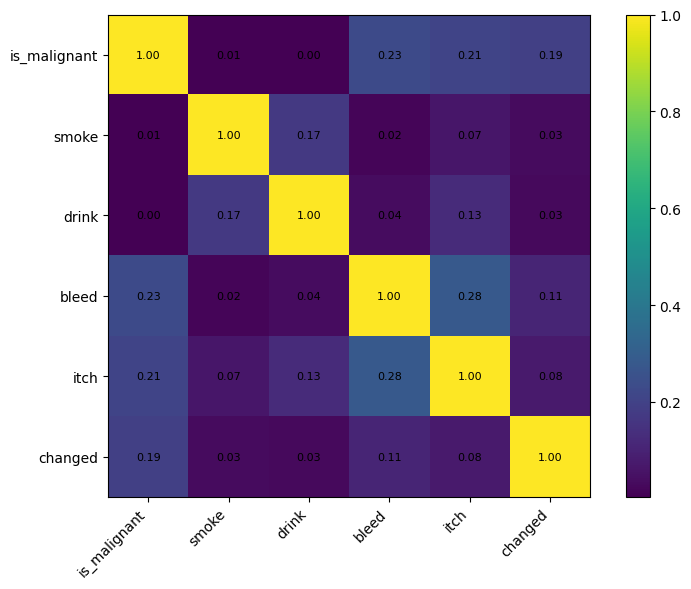

In [26]:
cats = ['is_malignant', 'smoke', 'drink', 'bleed', 'itch', 'changed']
n = len(cats)
mat = np.zeros((n,n))

for i, a in enumerate(cats):
    for j, b in enumerate(cats):
        mat[i,j] = cramers_v(df[a], df[b])



fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(mat, interpolation='nearest')
ax.set_xticks(range(n)); ax.set_yticks(range(n))
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_yticklabels(cats)



for i in range(n):
    for j in range(n):
        ax.text(j, i, f"{mat[i,j]:.2f}", ha='center', va='center', fontsize=8)

plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [31]:
def entropy(series):
    probs = series.value_counts(normalize=True)
    
    return -(probs * np.log2(probs)).sum()

def conditional_entropy(x, y):
    dfxy = pd.concat([x, y], axis=1)
    total = len(dfxy)
    ce = 0.0
    for _, sub in dfxy.groupby(y.name):
        p = len(sub) / total
        ce += p * entropy(sub.iloc[:,0])
    return ce

def theils_u(x, y):
    hx = entropy(x)
    h_x_given_y = conditional_entropy(x, y)

    return (hx - h_x_given_y) / hx

results = []

for s in ['bleed', 'itch', 'grew', 'hurt', 'changed', 'elevation']:
    test_df = df.copy().dropna(subset=[s, 'is_malignant'])
    test_df = test_df[test_df[s] != 'UNK']

    v = cramers_v(test_df[s], test_df['is_malignant'])
    u = theils_u(test_df[s], test_df['is_malignant'])
    results.append({'symptom': s, 'cramers_v': v, 'theils_u': u})

pd.DataFrame(results).sort_values('cramers_v', ascending=False)

,symptom,cramers_v,theils_u
5,elevation,0.430871,0.143490
2,grew,0.384592,0.110345
0,bleed,0.222061,0.044799
1,itch,0.202442,0.032225
3,hurt,0.182479,0.038828
4,changed,0.006188,0.000092


In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

train_df = df.copy()
train_col = ['bleed', 'itch', 'grew', 'hurt', 'changed', 'elevation', 'smoke', 'drink', 'cancer_history', 'gender']

train_df = df.copy().dropna(subset=train_col + ['is_malignant']).drop(columns=['background_father', 'background_mother'])

In [39]:
train_df.isna().sum()

patient_id             0
lesion_id              0
smoke                  0
drink                  0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
fitspatrick            0
region                 0
diameter_1             0
diameter_2             0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
is_malignant           0
age_bin                0
dtype: int64

In [ ]:
for col in train_col:
	train_df[col] = train_df[col].map({True: 1, False: 0, 'True': 1, 'False': 0, ""})

lr_model.fit(train_df[train_col], train_df['is_malignant'])

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values